# London - The Battle of Neighborhoods

#### IBM Data Science Professional Certificate by IBM/Coursera
*Final project*

## Introduction / Business Problem

London, city, capital of the United Kingdom is among the oldest of the world’s great cities—its history spanning nearly two millennia - and one of the most cosmopolitan. By far Britain’s largest metropolis, it is also the country’s economic, transportation, and cultural center.  London's continuous urban area extends beyond the borders of Greater London and was home to 9,787,426 people in 2011. According to Eurostat, London is the most populous city and metropolitan area of the European Union and the second most populous in Europe.  

The coronavirus / COVID-19 pandemic, one of the biggest health crises of our time and the greatest challenges has affected every country in the world. Since its outbreak in January of 2020, our lives and lifestyles have changed greatly.  One of the countries most affected by the virus is the UK and its capital London. Under current UK COVID-19 restrictions, the lockdown has been introduced, everyone in the UK must stay at home, travel is not possible, non-essential shops, leisure and entertainment venues closed, pubs and restaurants also, as well as schools. Additionally, households should not mix outdoors or indoors. 

Due to current restrictions, London sees a boom in walking as pandemic changes lifestyles. Walking is the only form of exercise many can do but after a stressful day of working from home, and a walk can often improve the mood.  The bans may be reduced soon, but there is a high possibility that they will not be lifted completely. 

I've chosen **London** for my project and will explore **which boroughs in London offer the most places for walking, recreation, or any other useful entertainment or activity. At the same time, those venues should offer the possibility of social distancing** which is very crucial in these times. All these activities/venues represent some kind of fun, and that is the reasons why I've named this project - Fun Battle of Neighborhoods.

The goal is to show which boroughs have the most venues answering these questions, how to cluster them, and show the data. The results could help residents to easily choose which boroughs to choose to explore for their daily activities, but also possible relocation, or opening a small business in the future. When traveling is possible, it can also be used by tourists interested in recreation, museums, landmarks, theaters, etc. 


## Data 

Data that will be used for this project:
- **The list of London boroughs on Wikipedia** (https://en.wikipedia.org/wiki/List_of_London_boroughs#List_of_boroughs_and_local_authorities) to pull the name, area, population, and headquarters for every borough. 
- **Foursquare API** -  to fetch venues that meet our requirements in every borough. 

### Importing libraries

Importing libraries that we've used in the lab exercises before and will use in this project.

In [2]:
!pip install folium
import numpy as np # library to handle data in a vectorized manner
import pandas as pd 
import requests

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

from bs4 import BeautifulSoup

print('Libraries imported.')

     |████████████████████████████████| 94 kB 3.6 MB/s  eta 0:00:01
Libraries imported.


### Data Processing

The code that will allow us to scrape the following Wikipedia page, https://en.wikipedia.org/wiki/List_of_London_boroughs#List_of_boroughs_and_local_authorities, in order to obtain the data that is in the table of all the boroughs in London and to transform the data into a pandas  dataframe like the one shown below:

In [3]:
from bs4 import BeautifulSoup
source = requests.get('https://en.wikipedia.org/wiki/List_of_London_boroughs#List_of_boroughs_and_local_authorities').text
soup=BeautifulSoup(source,'lxml')
print(soup.title)
from IPython.display import display_html
tab = str(soup.table)
display_html(tab,raw=True)

<title>List of London boroughs - Wikipedia</title>


Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2019 est)[1],Co-ordinates,Nr. in map
Barking and Dagenham [note 1],,,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,"212,906",51°33′39″N 0°09′21″E﻿ / ﻿51.5607°N 0.1557°E﻿ / 51.5607; 0.1557﻿ (Barking and Dagenham),25
Barnet,,,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,"395,896",51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W﻿ / 51.6252; -0.1517﻿ (Barnet),31
Bexley,,,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,"248,287",51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E﻿ / 51.4549; 0.1505﻿ (Bexley),23
Brent,,,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,"329,771",51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W﻿ / 51.5588; -0.2817﻿ (Brent),12
Bromley,,,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,"332,336",51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E﻿ / 51.4039; 0.0198﻿ (Bromley),20
Camden,Y,,Camden London Borough Council,Labour,"Camden Town Hall, Judd Street",8.40,"270,029",51°31′44″N 0°07′32″W﻿ / ﻿51.5290°N 0.1255°W﻿ / 51.5290; -0.1255﻿ (Camden),11
Croydon,,,Croydon London Borough Council,Labour,"Bernard Weatherill House, Mint Walk",33.41,"386,710",51°22′17″N 0°05′52″W﻿ / ﻿51.3714°N 0.0977°W﻿ / 51.3714; -0.0977﻿ (Croydon),19
Ealing,,,Ealing London Borough Council,Labour,"Perceval House, 14-16 Uxbridge Road",21.44,"341,806",51°30′47″N 0°18′32″W﻿ / ﻿51.5130°N 0.3089°W﻿ / 51.5130; -0.3089﻿ (Ealing),13
Enfield,,,Enfield London Borough Council,Labour,"Civic Centre, Silver Street",31.74,"333,794",51°39′14″N 0°04′48″W﻿ / ﻿51.6538°N 0.0799°W﻿ / 51.6538; -0.0799﻿ (Enfield),30
Greenwich [note 2],Y [note 3],Royal,Greenwich London Borough Council,Labour,"Woolwich Town Hall, Wellington Street",18.28,"287,942",51°29′21″N 0°03′53″E﻿ / ﻿51.4892°N 0.0648°E﻿ / 51.4892; 0.0648﻿ (Greenwich),22


Transform the data into a pandas  dataframe.

In [4]:
dfs = pd.read_html(tab)
london_boroughs = dfs[0]
london_boroughs.head()

,Borough,Inner,Status,Local authority,Political control,Headquarters,Area (sq mi),Population (2019 est)[1],Co-ordinates,Nr. in map
0,Barking and Dagenham [note 1],NaN,NaN,Barking and Dagenham London Borough Council,Labour,"Town Hall, 1 Town Square",13.93,212906,".mw-parser-output .geo-default,.mw-parser-outp...",25
1,Barnet,NaN,NaN,Barnet London Borough Council,Conservative,"Barnet House, 2 Bristol Avenue, Colindale",33.49,395896,51°37′31″N 0°09′06″W﻿ / ﻿51.6252°N 0.1517°W,31
2,Bexley,NaN,NaN,Bexley London Borough Council,Conservative,"Civic Offices, 2 Watling Street",23.38,248287,51°27′18″N 0°09′02″E﻿ / ﻿51.4549°N 0.1505°E,23
3,Brent,NaN,NaN,Brent London Borough Council,Labour,"Brent Civic Centre, Engineers Way",16.70,329771,51°33′32″N 0°16′54″W﻿ / ﻿51.5588°N 0.2817°W,12
4,Bromley,NaN,NaN,Bromley London Borough Council,Conservative,"Civic Centre, Stockwell Close",57.97,332336,51°24′14″N 0°01′11″E﻿ / ﻿51.4039°N 0.0198°E,20


Removing unnecessary columns and cleaning the data from Wikipedia. 

In [5]:
london_boroughs.drop(["Status", "Inner","Local authority", "Political control", "Co-ordinates", "Nr. in map"], axis=1, inplace=True) 
london_boroughs = london_boroughs.rename(columns={"Population (2019 est)[1]": "Population"})
london_boroughs = london_boroughs.rename(columns={"Area (sq mi)": "Area"})
london_boroughs.head()

,Borough,Headquarters,Area,Population
0,Barking and Dagenham [note 1],"Town Hall, 1 Town Square",13.93,212906
1,Barnet,"Barnet House, 2 Bristol Avenue, Colindale",33.49,395896
2,Bexley,"Civic Offices, 2 Watling Street",23.38,248287
3,Brent,"Brent Civic Centre, Engineers Way",16.70,329771
4,Bromley,"Civic Centre, Stockwell Close",57.97,332336


In [6]:
london_boroughs["Borough"] = london_boroughs["Borough"].apply(lambda x: x.replace(" [note 1]", "")) #removing the notes from the Borough column and leaving just the names of the Boroughs
london_boroughs["Borough"] = london_boroughs["Borough"].apply(lambda x: x.replace(" [note 2]", ""))
london_boroughs["Borough"] = london_boroughs["Borough"].apply(lambda x: x.replace(" [note 3]", ""))
london_boroughs["Borough"] = london_boroughs["Borough"].apply(lambda x: x.replace(" [note 4]", ""))
london_boroughs

,Borough,Headquarters,Area,Population
0,Barking and Dagenham,"Town Hall, 1 Town Square",13.93,212906
1,Barnet,"Barnet House, 2 Bristol Avenue, Colindale",33.49,395896
2,Bexley,"Civic Offices, 2 Watling Street",23.38,248287
3,Brent,"Brent Civic Centre, Engineers Way",16.70,329771
4,Bromley,"Civic Centre, Stockwell Close",57.97,332336
5,Camden,"Camden Town Hall, Judd Street",8.40,270029
6,Croydon,"Bernard Weatherill House, Mint Walk",33.41,386710
7,Ealing,"Perceval House, 14-16 Uxbridge Road",21.44,341806
8,Enfield,"Civic Centre, Silver Street",31.74,333794
9,Greenwich,"Woolwich Town Hall, Wellington Street",18.28,287942


Since I've noticed that for some boroughs the coordinates were not returned correctly, I've added the UK to each boroughs. Afterwards, the returned results were correct.

In [7]:
london_boroughs["Borough"] = london_boroughs["Borough"].apply(lambda s: s+', UK')
london_boroughs

,Borough,Headquarters,Area,Population
0,"Barking and Dagenham, UK","Town Hall, 1 Town Square",13.93,212906
1,"Barnet, UK","Barnet House, 2 Bristol Avenue, Colindale",33.49,395896
2,"Bexley, UK","Civic Offices, 2 Watling Street",23.38,248287
3,"Brent, UK","Brent Civic Centre, Engineers Way",16.70,329771
4,"Bromley, UK","Civic Centre, Stockwell Close",57.97,332336
5,"Camden, UK","Camden Town Hall, Judd Street",8.40,270029
6,"Croydon, UK","Bernard Weatherill House, Mint Walk",33.41,386710
7,"Ealing, UK","Perceval House, 14-16 Uxbridge Road",21.44,341806
8,"Enfield, UK","Civic Centre, Silver Street",31.74,333794
9,"Greenwich, UK","Woolwich Town Hall, Wellington Street",18.28,287942


In [8]:
london_boroughs.shape

(32, 4)

Getting the latitude and longitude for every borough

In [9]:
geolocator = Nominatim(user_agent="London_explorer")

london_boroughs['Major_Dist_Coord']= london_boroughs['Borough'].apply(geolocator.geocode).apply(lambda x: (x.latitude, x.longitude))
london_boroughs[['Latitude', 'Longitude']] = london_boroughs['Major_Dist_Coord'].apply(pd.Series)

london_boroughs.drop(['Major_Dist_Coord'], axis=1, inplace=True)
london_boroughs

,Borough,Headquarters,Area,Population,Latitude,Longitude
0,"Barking and Dagenham, UK","Town Hall, 1 Town Square",13.93,212906,51.554117,0.150504
1,"Barnet, UK","Barnet House, 2 Bristol Avenue, Colindale",33.49,395896,51.653090,-0.200226
2,"Bexley, UK","Civic Offices, 2 Watling Street",23.38,248287,51.441679,0.150488
3,"Brent, UK","Brent Civic Centre, Engineers Way",16.70,329771,51.442026,0.231523
4,"Bromley, UK","Civic Centre, Stockwell Close",57.97,332336,51.402805,0.014814
5,"Camden, UK","Camden Town Hall, Judd Street",8.40,270029,51.542305,-0.139560
6,"Croydon, UK","Bernard Weatherill House, Mint Walk",33.41,386710,51.371305,-0.101957
7,"Ealing, UK","Perceval House, 14-16 Uxbridge Road",21.44,341806,51.512655,-0.305195
8,"Enfield, UK","Civic Centre, Silver Street",31.74,333794,51.652085,-0.081018
9,"Greenwich, UK","Woolwich Town Hall, Wellington Street",18.28,287942,51.482084,-0.004542


Removing the UK from the Borough column, since we won't need it anymore.

In [10]:
london_boroughs["Borough"] = london_boroughs["Borough"].apply(lambda x: x.replace(", UK", ""))
london_boroughs.head()

,Borough,Headquarters,Area,Population,Latitude,Longitude
0,Barking and Dagenham,"Town Hall, 1 Town Square",13.93,212906,51.554117,0.150504
1,Barnet,"Barnet House, 2 Bristol Avenue, Colindale",33.49,395896,51.653090,-0.200226
2,Bexley,"Civic Offices, 2 Watling Street",23.38,248287,51.441679,0.150488
3,Brent,"Brent Civic Centre, Engineers Way",16.70,329771,51.442026,0.231523
4,Bromley,"Civic Centre, Stockwell Close",57.97,332336,51.402805,0.014814


In [11]:
london_final_data = london_boroughs

In [12]:
london_final_data.head()

,Borough,Headquarters,Area,Population,Latitude,Longitude
0,Barking and Dagenham,"Town Hall, 1 Town Square",13.93,212906,51.554117,0.150504
1,Barnet,"Barnet House, 2 Bristol Avenue, Colindale",33.49,395896,51.653090,-0.200226
2,Bexley,"Civic Offices, 2 Watling Street",23.38,248287,51.441679,0.150488
3,Brent,"Brent Civic Centre, Engineers Way",16.70,329771,51.442026,0.231523
4,Bromley,"Civic Centre, Stockwell Close",57.97,332336,51.402805,0.014814


## Visualizing data

### Use geopy library to get the latitude and longitude values of London

In order to define an instance of the geocoder, we need to define a user_agent. We will name our agent London_explorer, as shown below.

In [13]:
address = 'London'

geolocator = Nominatim(user_agent="London_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of London are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of London are 51.5073219, -0.1276474.


### Create a map of London with the boroughs

In [14]:
# create map of London using latitude and longitude values
map_london = folium.Map(location=[latitude, longitude], zoom_start=11)

 # add markers to map
for lat, lng, label in zip(london_final_data['Latitude'], london_final_data['Longitude'], london_final_data['Borough']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_london) 
    
map_london

Use Foursquare API to  explore the boroughs of London and segment them.

In [15]:
CLIENT_ID = 'RMOWJ1XJYOVJJFBDXMEHSCXOB1J4CDVRD1ZGJAJBRGKEZBF3' # your Foursquare ID
CLIENT_SECRET = 'UBAS0TZKCXYQLA3LOQI1KKTPLTPSVGLGDKMCWEWLI0ACV3ZE' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: RMOWJ1XJYOVJJFBDXMEHSCXOB1J4CDVRD1ZGJAJBRGKEZBF3
CLIENT_SECRET:UBAS0TZKCXYQLA3LOQI1KKTPLTPSVGLGDKMCWEWLI0ACV3ZE


Check the second row in the column borough for its latitude and longitude

In [16]:
london_final_data.loc[2, 'Borough']

'Bexley'

In [17]:
borough_latitude = london_final_data.loc[2, 'Latitude'] # neighborhood latitude value
borough_longitude = london_final_data.loc[2, 'Longitude'] # neighborhood longitude value

borough_name = london_final_data.loc[2, 'Borough'] # neighborhood name

print('Latitude and longitude values of {} are {}, {}.'.format(borough_name, 
                                                               borough_latitude, 
                                                               borough_longitude))

Latitude and longitude values of Bexley are 51.4416793, 0.150488.


Now, let's get the top 100 venues that are in Bexley within a radius of 750 meters.
Create the GET request URL and name it.

In [18]:
LIMIT = 100
radius = 750
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    borough_latitude, 
    borough_longitude, 
    radius, 
    LIMIT)
url

'https://api.foursquare.com/v2/venues/explore?&client_id=RMOWJ1XJYOVJJFBDXMEHSCXOB1J4CDVRD1ZGJAJBRGKEZBF3&client_secret=UBAS0TZKCXYQLA3LOQI1KKTPLTPSVGLGDKMCWEWLI0ACV3ZE&v=20180604&ll=51.4416793,0.150488&radius=750&limit=100'

In [19]:
results = requests.get(url).json()

From the Foursquare lab, we know that all the information is in the items key. Before we proceed, let's borrow the get_category_type function from the Foursquare lab.

In [20]:
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

Clean the json and structure it into a pandas dataframe

In [21]:
venues = results['response']['groups'][0]['items']
    
nearby_venues = pd.json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Ferraris,Italian Restaurant,51.441699,0.146755
1,King's Head,Pub,51.441730,0.149785
2,Old Bexley Greek Taverna,Greek Restaurant,51.441405,0.150640
3,The George,Pub,51.441756,0.150429
4,Holiday Inn London - Bexley,Hotel,51.446512,0.154543


Check how many venues are returned by Fourquare.

In [22]:
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

14 venues were returned by Foursquare.


## Explore Boroughs in London

Create a function to repeat the same process to all the neighborhoods in London

In [23]:
def getNearbyVenues(names, latitudes, longitudes, radius=750):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Borough', 
                  'Borough Latitude', 
                  'Borough Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

The code to run the above function on each borough and create a new dataframe called _london_venues_.

In [24]:
london_venues = getNearbyVenues(names=london_final_data['Borough'],
                                   latitudes=london_final_data['Latitude'],
                                   longitudes=london_final_data['Longitude']
                                  )

Barking and Dagenham
Barnet
Bexley
Brent
Bromley
Camden
Croydon
Ealing
Enfield
Greenwich
Hackney
Hammersmith and Fulham
Haringey
Harrow
Havering
Hillingdon
Hounslow
Islington
Kensington and Chelsea
Kingston upon Thames
Lambeth
Lewisham
Merton
Newham
Redbridge
Richmond upon Thames
Southwark
Sutton
Tower Hamlets
Waltham Forest
Wandsworth
Westminster


Let's check the size of the resulting dataframe

In [25]:
print(london_venues.shape)
london_venues.head()

(1755, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Barking and Dagenham,51.554117,0.150504,Iceland,51.560578,0.147685,Grocery Store
1,Barking and Dagenham,51.554117,0.150504,Shell,51.560415,0.148364,Gas Station
2,Barking and Dagenham,51.554117,0.150504,Tesco Express,51.551536,0.152784,Grocery Store
3,Barking and Dagenham,51.554117,0.150504,Connor Road Bus Stop,51.554345,0.147162,Bus Stop
4,Barking and Dagenham,51.554117,0.150504,Oglethorpe Road Bus Stop,51.555221,0.147136,Bus Stop


#### Create the dataframe that focuses only on fun, recreational or similar activities

In [26]:
searchfor = ['Park', 'Museum', 'Historic Site', 'Monument', 'Gallery', 'Theater', 'Performing Arts', 'Golf', 'Soccer', 'Fun', 'Concert Hall', 'Music Venue', 'Opera House']

london_venues_fun = london_venues[london_venues['Venue Category'].str.contains('|'.join(searchfor))].reset_index(drop=True)
london_venues_fun.index = np.arange(1, len(london_venues_fun)+1)

In [27]:
print (london_venues_fun['Venue Category'].value_counts())

Park                            40
Theater                         20
Art Gallery                      9
Movie Theater                    8
Historic Site                    7
History Museum                   7
Monument / Landmark              5
Indie Movie Theater              4
Art Museum                       4
Concert Hall                     4
Music Venue                      4
Museum                           3
Performing Arts Venue            3
Skate Park                       2
Theme Park Ride / Attraction     1
Golf Course                      1
Opera House                      1
Indie Theater                    1
Soccer Stadium                   1
Soccer Field                     1
Name: Venue Category, dtype: int64


Check how many unique categories are there.

In [28]:
print('There are {} uniques categories.'.format(len(london_venues_fun['Venue Category'].unique())))

There are 20 uniques categories.


Check the top 10 venues in the 32 boroughs

In [29]:
london_venues_top10 = london_venues_fun['Venue Category'].value_counts()[0:10].to_frame(name='frequency')
london_venues_top10 = london_venues_top10.reset_index()

london_venues_top10.rename(index=str, columns={"index": "Venue_Category", "frequency": "Frequency"}, inplace=True)
london_venues_top10

,Venue_Category,Frequency
0,Park,40
1,Theater,20
2,Art Gallery,9
3,Movie Theater,8
4,Historic Site,7
5,History Museum,7
6,Monument / Landmark,5
7,Indie Movie Theater,4
8,Art Museum,4
9,Concert Hall,4


Create a chart showing the most common venues in the London boroughs

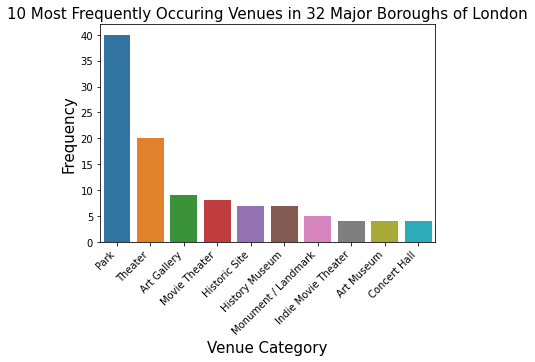

<Figure size 1296x504 with 0 Axes>

In [30]:
import seaborn as sns
from matplotlib import pyplot as plt

s=sns.barplot(x="Venue_Category", y="Frequency", data=london_venues_top10)
s.set_xticklabels(s.get_xticklabels(), rotation=45, horizontalalignment='right')

plt.title('10 Most Frequently Occuring Venues in 32 Major Boroughs of London', fontsize=15)
plt.xlabel("Venue Category", fontsize=15)
plt.ylabel ("Frequency", fontsize=15)
plt.savefig("Most_Freq_Venues1.png", dpi=300)
fig = plt.figure(figsize=(18,7))
plt.show()

Let's check how many venues were returned for each borough and sort them in count

In [31]:
summary = london_venues_fun.groupby('Borough').count().reset_index()
summary['Count'] = summary['Venue']
summary = summary.drop(['Borough Latitude', 'Borough Longitude', 'Venue', 'Venue Latitude', 'Venue Longitude','Venue Category'], axis=1)
summary = summary.sort_values('Count').reset_index(drop=True)
summary

,Borough,Count
0,Barnet,1
1,Sutton,1
2,Newham,1
3,Merton,1
4,Haringey,1
5,Harrow,1
6,Wandsworth,1
7,Hillingdon,1
8,Kingston upon Thames,1
9,Bromley,2


Creating the chart showing the categories by borough

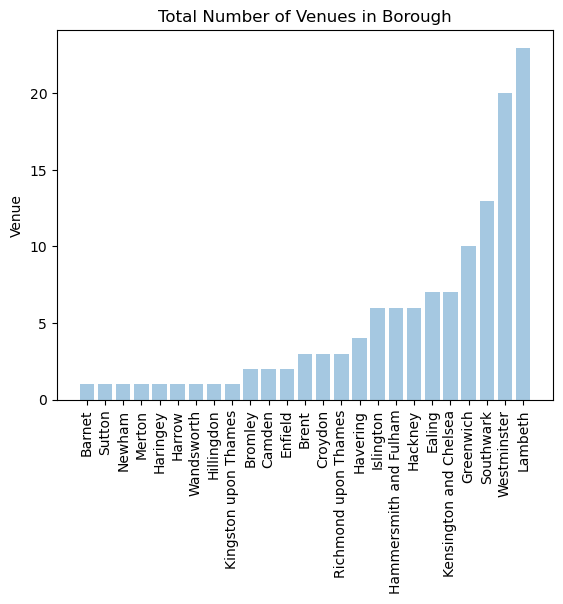

In [33]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt
 
objects = summary.Borough
y_pos = np.arange(len(objects))
performance = summary.Count

plt.bar(y_pos, performance, align='center', alpha=0.4)
plt.xticks(y_pos, objects)
plt.ylabel('Venue')
plt.title('Total Number of Venues in Borough')
plt.xticks(rotation=90)

plt.show()

In [34]:
print ("Shape of the Data-Frame with Venue Category only turistic info: ", london_venues_fun.shape)
london_venues_fun.head()

Shape of the Data-Frame with Venue Category only turistic info:  (126, 7)


,Borough,Borough Latitude,Borough Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
1,Barnet,51.653090,-0.200226,Old Court House Recreation Ground,51.651979,-0.202701,Park
2,Brent,51.442026,0.231523,Princes Park Stadium,51.436800,0.230793,Soccer Stadium
3,Brent,51.442026,0.231523,Hesketh Park,51.440030,0.234155,Park
4,Brent,51.442026,0.231523,Goals Soccer Centre,51.436264,0.234666,Soccer Field
5,Bromley,51.402805,0.014814,Church House Gardens,51.403010,0.012149,Park


#### Analyzing each borough by venues information

In [35]:
# one hot encoding
london_onehot = pd.get_dummies(london_venues_fun[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
london_onehot['Borough'] = london_venues_fun['Borough'] 

# move neighborhood column to the first column
list_column = london_onehot.columns.tolist()
number_column = int(list_column.index('Borough'))
list_column = [list_column[number_column]] + list_column[:number_column] + list_column[number_column+1:] 
london_onehot = london_onehot[list_column]

london_onehot.head()

,Borough,Art Gallery,Art Museum,Concert Hall,Golf Course,Historic Site,History Museum,Indie Movie Theater,Indie Theater,Monument / Landmark,Movie Theater,Museum,Music Venue,Opera House,Park,Performing Arts Venue,Skate Park,Soccer Field,Soccer Stadium,Theater,Theme Park Ride / Attraction
1,Barnet,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Brent,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,Brent,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,Brent,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
5,Bromley,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Group rows by borough and by taking the mean of the frequency of occurrence of each category

In [37]:
london_grouped = london_onehot.groupby('Borough').mean().reset_index()
london_grouped.head()

,Borough,Art Gallery,Art Museum,Concert Hall,Golf Course,Historic Site,History Museum,Indie Movie Theater,Indie Theater,Monument / Landmark,Movie Theater,Museum,Music Venue,Opera House,Park,Performing Arts Venue,Skate Park,Soccer Field,Soccer Stadium,Theater,Theme Park Ride / Attraction
0,Barnet,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.0
1,Brent,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.333333,0.0,0.0,0.333333,0.333333,0.0,0.0
2,Bromley,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5,0.000000,0.0,0.0,0.500000,0.0,0.0,0.000000,0.000000,0.0,0.0
3,Camden,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.5,0.0,0.500000,0.0,0.0,0.000000,0.000000,0.0,0.0
4,Croydon,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.333333,0.0,0.0,0.666667,0.0,0.0,0.000000,0.000000,0.0,0.0


Put everything into a pandas dataframe

In [38]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Now let's create the new dataframe and display the top 10 venues for each neighborhood.

In [39]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Borough']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
boroughs_venues_sorted = pd.DataFrame(columns=columns)
boroughs_venues_sorted['Borough'] = london_grouped['Borough']

for ind in np.arange(london_grouped.shape[0]):
    boroughs_venues_sorted.iloc[ind, 1:] = return_most_common_venues(london_grouped.iloc[ind, :], num_top_venues)

boroughs_venues_sorted.head()

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barnet,Park,Theme Park Ride / Attraction,Monument / Landmark,Art Museum,Concert Hall,Golf Course,Historic Site,History Museum,Indie Movie Theater,Indie Theater
1,Brent,Soccer Stadium,Soccer Field,Park,Theme Park Ride / Attraction,Indie Theater,Art Museum,Concert Hall,Golf Course,Historic Site,History Museum
2,Bromley,Movie Theater,Park,Monument / Landmark,Art Museum,Concert Hall,Golf Course,Historic Site,History Museum,Indie Movie Theater,Indie Theater
3,Camden,Park,Music Venue,Theme Park Ride / Attraction,Monument / Landmark,Art Museum,Concert Hall,Golf Course,Historic Site,History Museum,Indie Movie Theater
4,Croydon,Park,Museum,Theme Park Ride / Attraction,Monument / Landmark,Art Museum,Concert Hall,Golf Course,Historic Site,History Museum,Indie Movie Theater


## Clustering Boroughs

Run K-Means to cluster the boroughs into 3 clusters because when I analyze the K-Means with elbow method it ensured me the 3 degree for optimum k of the K-Means

In [41]:
# set number of clusters
kclusters = 3

london_grouped_clustering = london_grouped.drop('Borough', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(london_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 1, 1, 1, 0, 1, 1, 1, 1, 0], dtype=int32)

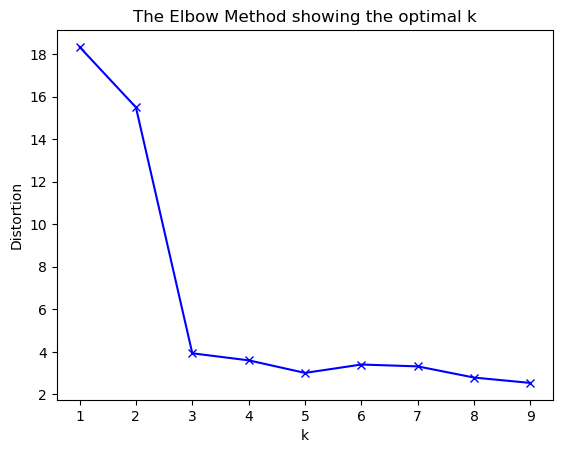

In [42]:
from scipy.spatial.distance import cdist

distortions = []
K = range(1,10)
for k in K:
    kmeanModel = KMeans(n_clusters=k, random_state=0).fit(london_grouped_clustering)
    #kmeanModel.fit(istanbul_grouped_clustering)
    distortions.append(sum(np.min(cdist(london_grouped_clustering, kmeanModel.cluster_centers_, 'canberra'), axis=1)) / london_grouped_clustering.shape[0])

#There are different metric distance function for spatial distance. 
#I choose correlation instaed of euclidean because the canberra function gives me more clear view of elbow break point.

# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [43]:
# add clustering labels
boroughs_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

london_merged = london_final_data

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
london_merged = london_merged.join(boroughs_venues_sorted.set_index('Borough'), on='Borough')

london_merged.head() # check the last columns!

,Borough,Headquarters,Area,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Barking and Dagenham,"Town Hall, 1 Town Square",13.93,212906,51.554117,0.150504,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Barnet,"Barnet House, 2 Bristol Avenue, Colindale",33.49,395896,51.653090,-0.200226,0.0,Park,Theme Park Ride / Attraction,Monument / Landmark,Art Museum,Concert Hall,Golf Course,Historic Site,History Museum,Indie Movie Theater,Indie Theater
2,Bexley,"Civic Offices, 2 Watling Street",23.38,248287,51.441679,0.150488,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Brent,"Brent Civic Centre, Engineers Way",16.70,329771,51.442026,0.231523,1.0,Soccer Stadium,Soccer Field,Park,Theme Park Ride / Attraction,Indie Theater,Art Museum,Concert Hall,Golf Course,Historic Site,History Museum
4,Bromley,"Civic Centre, Stockwell Close",57.97,332336,51.402805,0.014814,1.0,Movie Theater,Park,Monument / Landmark,Art Museum,Concert Hall,Golf Course,Historic Site,History Museum,Indie Movie Theater,Indie Theater


In [44]:
london_merged = london_merged.dropna()
london_merged

,Borough,Headquarters,Area,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barnet,"Barnet House, 2 Bristol Avenue, Colindale",33.49,395896,51.653090,-0.200226,0.0,Park,Theme Park Ride / Attraction,Monument / Landmark,Art Museum,Concert Hall,Golf Course,Historic Site,History Museum,Indie Movie Theater,Indie Theater
3,Brent,"Brent Civic Centre, Engineers Way",16.70,329771,51.442026,0.231523,1.0,Soccer Stadium,Soccer Field,Park,Theme Park Ride / Attraction,Indie Theater,Art Museum,Concert Hall,Golf Course,Historic Site,History Museum
4,Bromley,"Civic Centre, Stockwell Close",57.97,332336,51.402805,0.014814,1.0,Movie Theater,Park,Monument / Landmark,Art Museum,Concert Hall,Golf Course,Historic Site,History Museum,Indie Movie Theater,Indie Theater
5,Camden,"Camden Town Hall, Judd Street",8.40,270029,51.542305,-0.139560,1.0,Park,Music Venue,Theme Park Ride / Attraction,Monument / Landmark,Art Museum,Concert Hall,Golf Course,Historic Site,History Museum,Indie Movie Theater
6,Croydon,"Bernard Weatherill House, Mint Walk",33.41,386710,51.371305,-0.101957,0.0,Park,Museum,Theme Park Ride / Attraction,Monument / Landmark,Art Museum,Concert Hall,Golf Course,Historic Site,History Museum,Indie Movie Theater
7,Ealing,"Perceval House, 14-16 Uxbridge Road",21.44,341806,51.512655,-0.305195,1.0,Park,Art Gallery,Performing Arts Venue,Theater,Indie Theater,Art Museum,Concert Hall,Golf Course,Historic Site,History Museum
8,Enfield,"Civic Centre, Silver Street",31.74,333794,51.652085,-0.081018,1.0,Park,Theater,Theme Park Ride / Attraction,Monument / Landmark,Art Museum,Concert Hall,Golf Course,Historic Site,History Museum,Indie Movie Theater
9,Greenwich,"Woolwich Town Hall, Wellington Street",18.28,287942,51.482084,-0.004542,1.0,Historic Site,Park,History Museum,Art Gallery,Indie Movie Theater,Museum,Theater,Indie Theater,Art Museum,Concert Hall
10,Hackney,"Hackney Town Hall, Mare Street",7.36,281120,51.543240,-0.049362,1.0,Park,Movie Theater,History Museum,Theater,Monument / Landmark,Art Museum,Concert Hall,Golf Course,Historic Site,Indie Movie Theater
11,Hammersmith and Fulham,"Town Hall, King Street",6.33,185143,51.492038,-0.223640,0.0,Park,Concert Hall,Theater,Theme Park Ride / Attraction,Monument / Landmark,Art Museum,Golf Course,Historic Site,History Museum,Indie Movie Theater


We can also estimate the number of 1st Most Common Venue in each cluster.Thus, we can create a bar chart which may help us to find proper label names for each cluster.

In [46]:
count_venue = london_merged
count_venue = count_venue.drop(['Borough', 'Latitude', 'Longitude'], axis=1)
count_venue = count_venue.groupby(['Cluster Labels','1st Most Common Venue']).size().reset_index(name='Counts')

#we can transpose it to plot bar chart
cv_cluster = count_venue.pivot(index='Cluster Labels', columns='1st Most Common Venue', values='Counts')
cv_cluster = cv_cluster.fillna(0).astype(int).reset_index(drop=True)
cv_cluster

1st Most Common Venue,Art Gallery,Golf Course,Historic Site,Movie Theater,Park,Soccer Stadium,Theater
0,0,0,0,0,9,0,0
1,1,1,1,1,6,1,4
2,0,0,0,1,0,0,0


Text(0, 0.5, 'Clusters')

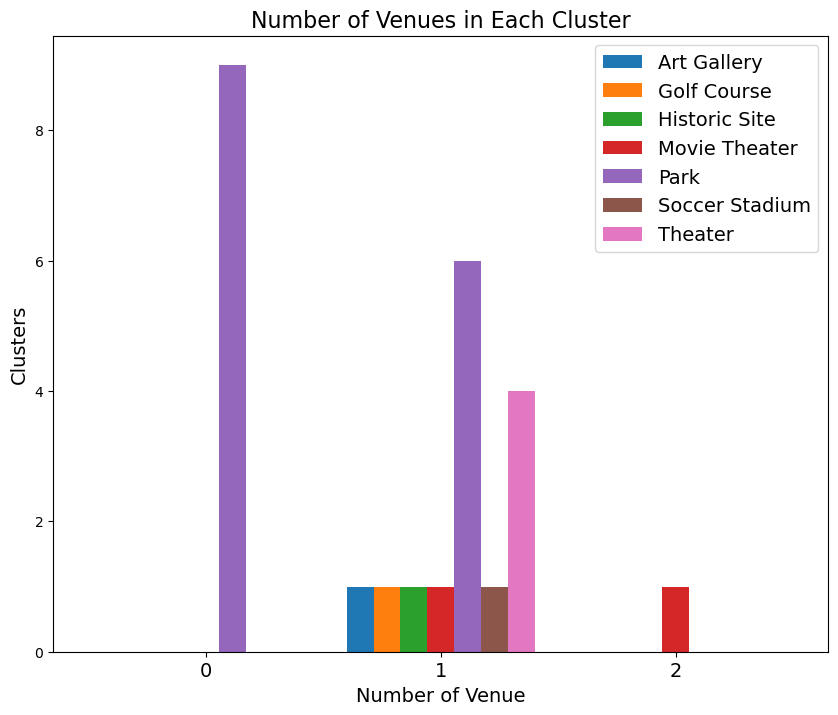

In [47]:
#creating a bar chart of "Number of Venues in Each Cluster"
frame=cv_cluster.plot(kind='bar',figsize=(10,8),width = 0.8)

plt.legend(labels=cv_cluster.columns,fontsize= 14)
plt.title("Number of Venues in Each Cluster",fontsize= 16)
plt.xticks(fontsize=14)
plt.xticks(rotation=0)
plt.xlabel('Number of Venue', fontsize=14)
plt.ylabel('Clusters', fontsize=14)

In [48]:
Cluster_labels = {'Clusters': [0,1,2], 'Labels': ["Parks","Multiple Fun Venues","Theaters"]}
Cluster_labels = pd.DataFrame(data=Cluster_labels)
Cluster_labels

,Clusters,Labels
0,0,Parks
1,1,Multiple Fun Venues
2,2,Theaters


In [49]:
london_merged['Cluster Labels'] = london_merged['Cluster Labels'].astype(int)

#### Visualize the resulting clusters

In [55]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(london_merged['Latitude'], london_merged['Longitude'], london_merged['Borough'], london_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.8).add_to(map_clusters)
       
map_clusters

## Results

In [51]:
london_merged.loc[london_merged['Cluster Labels'] == 0, london_merged.columns[[0] + list(range(3, london_merged.shape[1]))]]

,Borough,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Barnet,395896,51.653090,-0.200226,0,Park,Theme Park Ride / Attraction,Monument / Landmark,Art Museum,Concert Hall,Golf Course,Historic Site,History Museum,Indie Movie Theater,Indie Theater
6,Croydon,386710,51.371305,-0.101957,0,Park,Museum,Theme Park Ride / Attraction,Monument / Landmark,Art Museum,Concert Hall,Golf Course,Historic Site,History Museum,Indie Movie Theater
11,Hammersmith and Fulham,185143,51.492038,-0.223640,0,Park,Concert Hall,Theater,Theme Park Ride / Attraction,Monument / Landmark,Art Museum,Golf Course,Historic Site,History Museum,Indie Movie Theater
12,Haringey,268647,51.587930,-0.105410,0,Park,Theme Park Ride / Attraction,Monument / Landmark,Art Museum,Concert Hall,Golf Course,Historic Site,History Museum,Indie Movie Theater,Indie Theater
13,Harrow,251160,51.596827,-0.337316,0,Park,Theme Park Ride / Attraction,Monument / Landmark,Art Museum,Concert Hall,Golf Course,Historic Site,History Museum,Indie Movie Theater,Indie Theater
15,Hillingdon,306870,51.542519,-0.448335,0,Park,Theme Park Ride / Attraction,Monument / Landmark,Art Museum,Concert Hall,Golf Course,Historic Site,History Museum,Indie Movie Theater,Indie Theater
22,Merton,206548,51.410870,-0.188097,0,Park,Theme Park Ride / Attraction,Monument / Landmark,Art Museum,Concert Hall,Golf Course,Historic Site,History Museum,Indie Movie Theater,Indie Theater
27,Sutton,206349,51.357464,-0.173627,0,Park,Theme Park Ride / Attraction,Monument / Landmark,Art Museum,Concert Hall,Golf Course,Historic Site,History Museum,Indie Movie Theater,Indie Theater
30,Wandsworth,329677,51.457027,-0.193261,0,Park,Theme Park Ride / Attraction,Monument / Landmark,Art Museum,Concert Hall,Golf Course,Historic Site,History Museum,Indie Movie Theater,Indie Theater


In [52]:
london_merged.loc[london_merged['Cluster Labels'] == 1, london_merged.columns[[0] + list(range(3, london_merged.shape[1]))]]

,Borough,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
3,Brent,329771,51.442026,0.231523,1,Soccer Stadium,Soccer Field,Park,Theme Park Ride / Attraction,Indie Theater,Art Museum,Concert Hall,Golf Course,Historic Site,History Museum
4,Bromley,332336,51.402805,0.014814,1,Movie Theater,Park,Monument / Landmark,Art Museum,Concert Hall,Golf Course,Historic Site,History Museum,Indie Movie Theater,Indie Theater
5,Camden,270029,51.542305,-0.139560,1,Park,Music Venue,Theme Park Ride / Attraction,Monument / Landmark,Art Museum,Concert Hall,Golf Course,Historic Site,History Museum,Indie Movie Theater
7,Ealing,341806,51.512655,-0.305195,1,Park,Art Gallery,Performing Arts Venue,Theater,Indie Theater,Art Museum,Concert Hall,Golf Course,Historic Site,History Museum
8,Enfield,333794,51.652085,-0.081018,1,Park,Theater,Theme Park Ride / Attraction,Monument / Landmark,Art Museum,Concert Hall,Golf Course,Historic Site,History Museum,Indie Movie Theater
9,Greenwich,287942,51.482084,-0.004542,1,Historic Site,Park,History Museum,Art Gallery,Indie Movie Theater,Museum,Theater,Indie Theater,Art Museum,Concert Hall
10,Hackney,281120,51.543240,-0.049362,1,Park,Movie Theater,History Museum,Theater,Monument / Landmark,Art Museum,Concert Hall,Golf Course,Historic Site,Indie Movie Theater
14,Havering,259552,51.544385,-0.144307,1,Art Gallery,Park,Music Venue,Monument / Landmark,Art Museum,Concert Hall,Golf Course,Historic Site,History Museum,Indie Movie Theater
17,Islington,242467,51.538429,-0.099905,1,Theater,Movie Theater,Art Museum,Park,Music Venue,Indie Theater,Concert Hall,Golf Course,Historic Site,History Museum
18,Kensington and Chelsea,156129,51.498480,-0.199043,1,Park,History Museum,Art Gallery,Opera House,Museum,Indie Theater,Art Museum,Concert Hall,Golf Course,Historic Site


In [53]:
london_merged.loc[london_merged['Cluster Labels'] == 2, london_merged.columns[[0] + list(range(3, london_merged.shape[1]))]]

,Borough,Population,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,Newham,353134,51.53,0.029318,2,Movie Theater,Theater,Art Museum,Concert Hall,Golf Course,Historic Site,History Museum,Indie Movie Theater,Indie Theater,Monument / Landmark
